# Image Embedding Example Using Fiftyone

This is an example showing how to visualize custom embedding, based on the input images, using Fiftyone and UMAP. 

* **required environment**: `machine-learning`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.brain as fob

In [2]:
dataset = foz.load_zoo_dataset('mnist')

Split 'train' already downloaded
Split 'test' already downloaded
Loading 'mnist' split 'train'
 100% |█████████████| 60000/60000 [26.3s elapsed, 0s remaining, 2.3K samples/s]      
Loading 'mnist' split 'test'
 100% |█████████████| 10000/10000 [4.4s elapsed, 0s remaining, 2.3K samples/s]      
Dataset 'mnist' created


In [3]:
test_split = dataset.match_tags('test')
print(test_split)

Dataset:     mnist
Media type:  image
Num samples: 10000
Tags:        ['test']
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
View stages:
    1. MatchTags(tags=['test'], bool=True)


## Generating the embeddings

Here we generate the embeddings based on the images. Images are loaded, and stacked vertically in order to achieve the following embedding space: `num_samples x num_embedding_dims`.

Size of the embedding: (10000, 784)


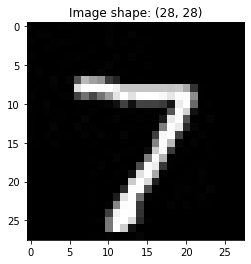

In [4]:
img = cv2.imread(test_split.values("filepath")[0], cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap='gray')
plt.title(f'Image shape: {img.shape}')

# Generate embeddings
embeddings = np.array([
    cv2.imread(f, cv2.IMREAD_UNCHANGED).ravel()
    for f in test_split.values("filepath")])
print(f'Size of the embedding: {embeddings.shape}')

## Calculate 2D representation of the embedding

Here we use [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection for Dimension Reduction) to calculate a 2D visualization of the embedding. For more information regarding the `compute_visualization()` method, take a look at the documentation https://voxel51.com/docs/fiftyone/api/fiftyone.brain.html#fiftyone.brain.compute_visualization.

Main parameters for the `compute_visualization()` method:

* **embeddings**. pre-computed embeddings to use. Can be any of the following
 * a `num_samples x num_embedding_dims` array of embeddings
 * if `patches_field` is specified, a dict mapping sample IDs to num_patches x num_embedding_dims arrays of patch embeddings
 * the name of a dataset field containing the embeddings to use



In [5]:
# Compute 2D representation
results = fob.compute_visualization(
    test_split,
    embeddings = embeddings,
    num_dims = 2,
    method = "umap",
    brain_key = "mnist_test",
    verbose = True,
    seed = 51,
)

Generating visualization...
UMAP(random_state=51, verbose=True)
Mon Mar 14 07:50:27 2022 Construct fuzzy simplicial set
Mon Mar 14 07:50:27 2022 Finding Nearest Neighbors
Mon Mar 14 07:50:27 2022 Building RP forest with 10 trees
Mon Mar 14 07:50:27 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Mon Mar 14 07:50:35 2022 Finished Nearest Neighbor Search
Mon Mar 14 07:50:37 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Mar 14 07:50:48 2022 Finished embedding


In [6]:
print(type(results))
print(results.points.shape)

<class 'fiftyone.brain.visualization.VisualizationResults'>
(10000, 2)


In [7]:
# Launch App instance
# session = fo.launch_app(view=test_split)

In [8]:
# Plot embeddings colored by ground truth label
plot = results.visualize(labels="ground_truth.label")
plot.show(height=720)

# Attach plot to session
# session.plots.attach(plot)

FigureWidget({
    'data': [{'customdata': array(['622ed7962fbd318744dccb62', '622ed7962fbd318744dccb75',
    …